# World Energy Patterns: will the Smart Cities improve the energy mix?
## Exploring energy consumption and production patterns worldwide and in countries with top performing Smart Cities

As everybody knows, population, energy consumptions and climate-related challenges are growing constantly
(and sometimes even esponencially). 
Smart cities could be the new sustainable urban environment to tackle with these challenges?
Are the countries with the top Smart Cities the best performing ones?

#### Goal of the project:
From the cross-analysis of World Energy Consumption (WEC), Smart City Indexes (SCI), Greenhouse Gases (GHG) emissions and a comparison forecsast on energy consumption in USA and the Netherlands, trends are identified and converted into insights of smart cities' business opportinities.

**Dataset sources**

1. **Smart Cities Index dataset**<br>
The IMD-SUTD Smart City Index (SCI) assesses the perceptions of residents on issues related to structures and technology applications available to them in their city. In the SCI’s context, ‘smart city’ describes  an  urban  setting  that  apply  technology  to  enhance  the  benefits  and  diminish  thes shortcomings of urbanization. The SCI is evaluated based on the 36 questions related to the two factors. Each factor is evaluated over five key areas: Health & Safety, Mobility, Activities, Opportunities for work and school, and Governance. Retrieved from [**Kaggle**](https://www.kaggle.com/datasets/magdamonteiro/smart-cities-index-datasets) (2020).
 
2. **World Energy Consumption**<br>
Data on Energy by Our World in Data: this dataset is a collection of key metrics maintained by Our World in Data. It is updated regularly and includes data on energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix and other relevant metrics. This data has been collected, aggregated, and documented by Hannah Ritchie, Max Roser and Edouard Mathieu from different sources.
Retrieved from [**Kaggle**](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption) 

3. **Historical GHG emissions**<br>
Climate Watch: The PRIMAP-hist national historical emissions time series (1850-2019) Date Of Content: 1850-2019 Summary Of Licenses: Creative Commons Attribution-NonCommercial 4.0 International license Citation: Gütschow, J.; Günther, A.; Pflüger, M. (2021): The PRIMAP-hist national historical emissions time series v2.3.1 (1850-2019). 
[**Available here**](https://www.climatewatchdata.org/ghg-emissions).



# Table of contents
- [1. Smart Cities Index](#1-smart-cities-index)


<a id="section-one"></a>
# 1. Smart Cities Index

## Loading and formatting the data

Population in smart cities is growing, as well as climate-related challenges.
Smart cities are seen to become the new sustainable urban environment to tackle with these challenges with the help of digitalisation and big data analysis.

In the first part of the project the focus will be on the Smart Cities Index dataset to identify if the total Smart City Index has any of subindexes (areas of assesment and living) that contribute more to its value. 

The key goal is to identify priority areas for smart cities development.

In [118]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import scipy
import math
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# utils
from utils import cleaning, config, eda

In [119]:
# Loadindg and formatting data 
sci_raw = cleaning.load_data(config.DB_SCI_PATH)

# Format column name and change index
sci = sci_raw.copy()
sci = sci.drop('SmartCity_Index_relative_Edmonton', axis=1) # not useful
sci = cleaning.format_data(sci) 

# Display some useful input
display(eda.report(sci))
display(sci.head())

,nan_count,dtype,unique
city,0,object,102
country,0,object,36
smart_mobility,0,int64,100
smart_environment,0,int64,98
smart_government,0,int64,98
smart_economy,0,int64,99
smart_people,0,int64,98
smart_living,0,int64,38
smartcity_index,0,int64,100


,city,country,smart_mobility,smart_environment,smart_government,smart_economy,smart_people,smart_living,smartcity_index
id,,,,,,,,,
1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812


### Comments:
Data is clean and does not have missing values.

## EDA
In the exploratory analysis following questions are answered:
1. What are the mean Smart City Indexes (SCI) for each country ?
2. What are the top 10 countries with best SCI?
3. How the different indexes behave and which ones give the best contribution?

In [120]:
cols = sci.select_dtypes(np.number).columns

mean_sci = pd.DataFrame(sci.groupby('country')[cols].mean()).astype('int64')
mean_sci = mean_sci.sort_values('smartcity_index', ascending=False).iloc[:10, :]
mean_sci.style.background_gradient(cmap='Greens')

,smart_mobility,smart_environment,smart_government,smart_economy,smart_people,smart_living,smartcity_index
country,,,,,,,
Netherlands,7540,5558,8528,8095,7098,7280,7311
Norway,6346,6913,7038,4943,7955,9090,7072
Canada,6585,4765,6566,6629,7112,9413,6898
Singapore,5790,4344,5560,5535,9695,10000,6813
Denmark,6205,8184,7595,5135,6377,7200,6776
Austria,5683,7608,6232,5415,8580,7500,6771
Switzerland,5326,8775,5591,6265,6425,7960,6707
Sweden,5127,8100,7863,5518,6132,7730,6658
Finland,4912,6535,6148,8055,5980,8710,6643


Text(0.5, 1.0, 'Smart City Index per country, ordered')

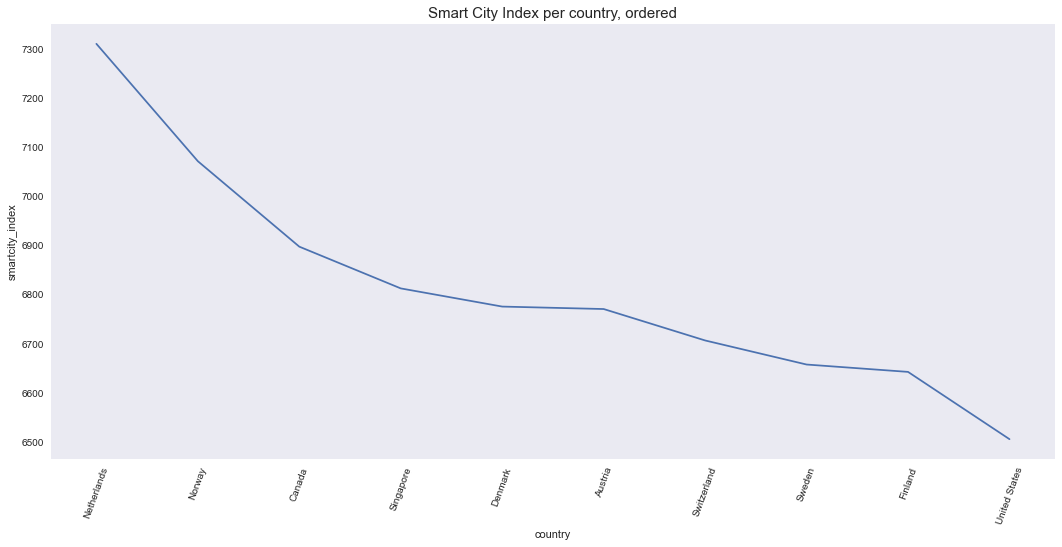

In [121]:
# Visualizing the trend

plt.figure(figsize=(18, 8))
plt.xticks(rotation=70)
plt.grid()
sns.lineplot(x = mean_sci.index, y=mean_sci.smartcity_index)
plt.title('Smart City Index per country, ordered', fontsize = 15)

In [122]:
# Dataset descriptive statistics
sci.describe().round().astype('int64')

,smart_mobility,smart_environment,smart_government,smart_economy,smart_people,smart_living,smartcity_index
count,102,102,102,102,102,102,102
mean,5759,5944,5894,6132,5874,6377,5992
std,1214,1724,1153,1802,1449,2286,853
min,3175,1850,2806,1490,2825,1980,4191
25%,4810,4530,5143,5008,4725,4385,5366
50%,5652,6495,5911,6432,5748,6485,6262
75%,6764,7310,6582,7492,7061,8710,6672
max,8110,8844,8726,9225,9695,10000,7353


Text(0.5, 1.0, 'Boxplot of Smart City Indexes')

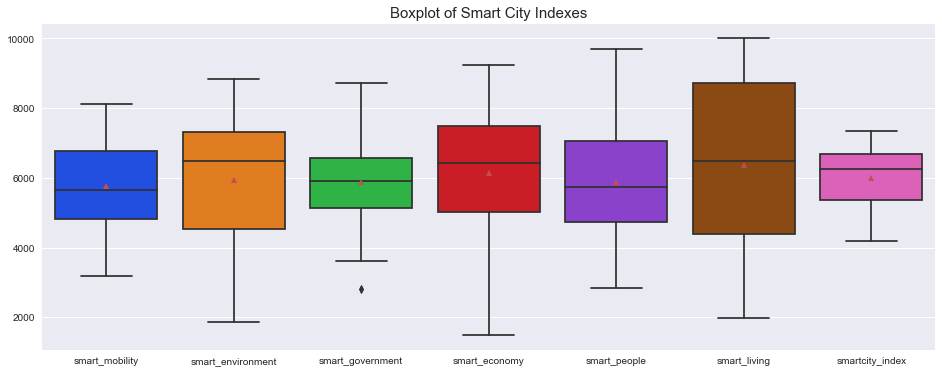

In [123]:
#  Distribution of the differents indexes in a boxplot
plt.figure(figsize=(16,6))
sns.boxplot(data=sci, showmeans=True, palette='bright')
plt.title('Boxplot of Smart City Indexes', fontsize = 15)

**Insights:**

Smart Living as well as Smart Environment indexes have the largest data dispersion, while the Smart Government the smallest.
The boxplot shows that the median (line) and mean (green triangle) values often don't match, meaning that the distribution of values is not normal for most of the indexes.



### Correlation between Smart Cities Indexes

Let's look at the correlation between all Smart City indexes to identify if there are some of them that potentially contribute more to the total smart city index.

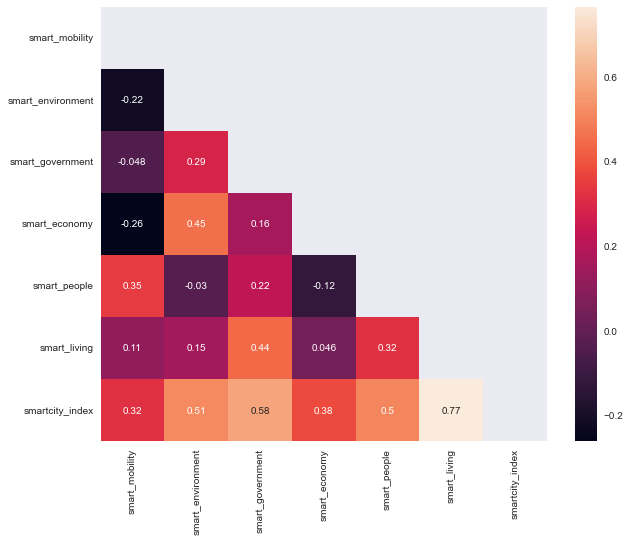

In [124]:
# Correlation heatmap
eda.show_corr_heatmap(sci, figsize=(10, 8))

<Figure size 576x720 with 0 Axes>

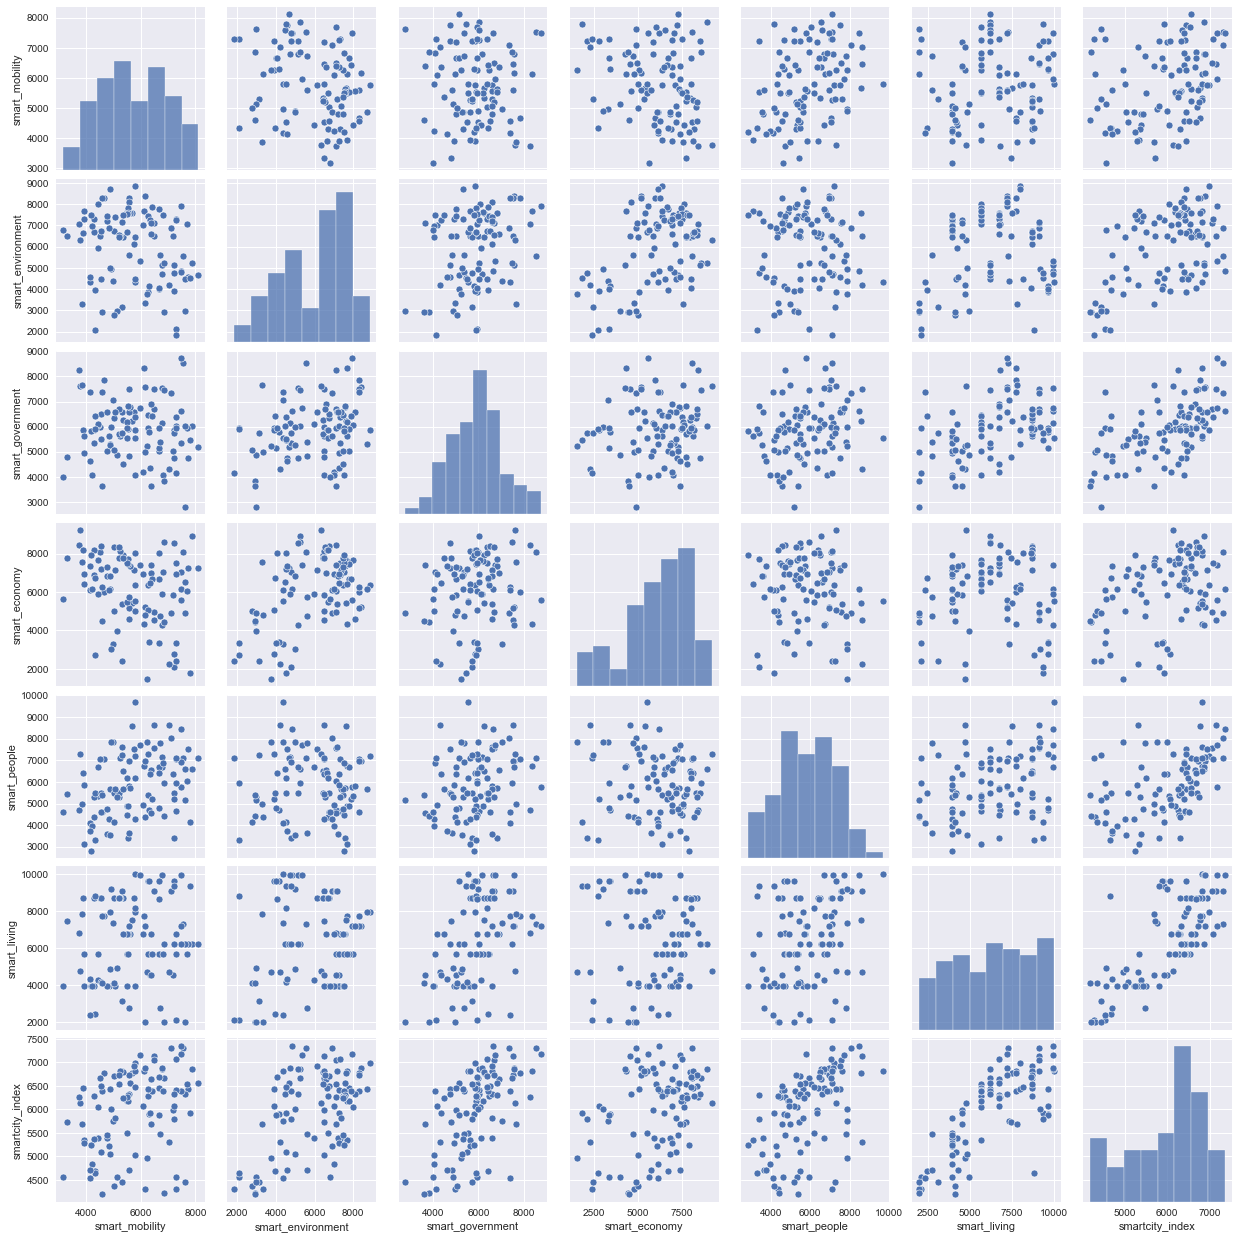

In [125]:
# Pairplot
plt.figure(figsize=(8, 10))
sns.pairplot(sci)
plt.show()

In [126]:
# Closer look to correlations
eda.report_multicoll(sci).sort_values('corr', ascending=False).round(2)

,feat1,feat2,corr
6,smart_living,smartcity_index,0.77
4,smart_government,smartcity_index,0.58
2,smart_environment,smartcity_index,0.51
9,smart_people,smartcity_index,0.50
1,smart_economy,smart_environment,0.45
3,smart_government,smart_living,0.44
0,smart_economy,smartcity_index,0.38
7,smart_mobility,smart_people,0.35
8,smart_mobility,smartcity_index,0.32
5,smart_living,smart_people,0.32


**Insights from the correlation analysis**

1. Smart City index has high and medium correlations with several sub-indexes: Smart Living (0.77), Smart Government (0.58), Smart Environment / Smart People (~0.50).
2. Sub-indexes has medium-low correlation between each others. This is expected due to the fact one can suppose quality of life depends on al these factors in an interconnected way.
3. These high multicollinearity in the dataset should be further analyzed to identify trends: probably the assessment methodology (the questionnaires) should be improved.

# 2. World Energy Consumption

## Loading (and understanding) the dataset

In [127]:
# Load the data
wec_raw = cleaning.load_data(config.DB_WEC_PATH)

# Dump value counts for further exploration
cleaning.dump_value_counts('data_expl/', wec_raw)

### Formatting the dataset

The dataset can be easily explored if it is categorised into 4 large groups:
1. Pure energy sources data (Oil, Gas, Nuclear etc.)
2. Aggregated energy sources data (Renewables, Low-Carbon, etc.)
3. Overall energy measures (energy consumption per capita, electricty production etc.)
4. Identifiers (year, country, population, gross product etc.)

Moreover categories 1 and 2 can be aggregated in a template structure such as:

**\<energy-src\>\_\<cons/share/prod\>\_\<share/per_capita/[NULL]\>\_\<twh/pct/[NULL]>**

For each category * and * column is identified by the following keywords:

* Consumption Data **cons**:<br>
   **cons** data can be:
   * primary energy consumption in terawatt-hours if no keyword follows **cons**;
   * followed by keyword **change** representing annual change in energy consumption, expressed by:
      * percentatage, if followd by **pct**;
      * terawatt-hours, if followed by **twh**;
   * per capita, (energy consumption divided by population) if followed by keyword **per_capita**;
* Electricity consumption from the energy source, identified by keyword **elec**, as:
   * pure electricity consumption ifno other keyword is present;
   * per capita, (energy consumption divided by population) if followed by keyword **per_capita**;
* The share (%) among the other energy sources with keywrd **share**, followed by:
   * **elec**, if referred to electricity consumption;
   * **energy** if referred to pure energy source;
* The production of the energy sources with keyword **prod**, followed by:
   * if no additional keywords, is the overall production in terawatt hours;
   * **per_capita**, accounting for the production per capita in twh;
   * **change**, accounting for the annual change in production:
      * could be percentage if **pct**
      * could be in twh if **twh**

In [168]:
# Categorize columns with the directives from above
pure_energy_src = ['biofuel', 'coal', 'gas', 'hydro', 'nuclear', 'oil', 'solar', 'wind']
aggragated_energy_src = ['fossil', 'low-carbon', 'other-renewables', 
                         'other-renewables-exc-biofuel', 'renewables']
overall_energy_measures = ['energy_cons_change_pct', 'energy_cons_change_pct', 
                           'carbon_intensity_elec', 'electricity_generation', 
                           'fossil_electricity', 'renewables_electricity',
                           'energy_per_gdp', 'energy_per_capita', 
                           'per_capita_electricity', 'primary_energy_consumption']
identifiers = ['iso_code', 'country', 'year', 'population', 'gdp']

In [129]:
# Format data as explined
# production --> prod
# consumption --> cons
# electricity --> elec
# TODO: refacor the code

wec = wec_raw.copy()

wec.columns = wec_raw.columns.str.replace('production', 'prod').str.replace('electricity', 'elec').str.replace('consumption', 'cons')
wec.columns = wec.columns.str.replace('renewable', 'renewables')
wec.columns = wec.columns.str.replace('renewabless', 'renewables')
wec.columns = wec.columns.str.replace('low_carbon', 'low-carbon')
wec.columns = wec.columns.str.replace('other_renewables', 'other-renewables')
wec.columns = wec.columns.str.replace('other-renewables_exc_biofuel_electricity', 'other-renewables-exc-biofuel_elec')
wec.columns = wec.columns.str.replace('other-renewables_elec_per_capita_exc_biofuel', 'other-renewables-exc-biofuel_elec_per_capita')
wec.columns = wec.columns.str.replace('other-renewables_share_elec_exc_biofuel', 'other-renewables-exc-biofuel_share_elec')
wec.columns = wec.columns.str.replace('other-renewables_exc_biofuel', 'other-renewables-exc-biofuel')

# if after a energy src "energy" is present, it is an alias for primary energy consumption "cons" and could be substitued
old_cols = list(wec.columns)
new_cols = old_cols
for i in range(len(wec_raw.columns)):
    # Check that col refer to an energy src and 'energy' keyword is in 2nd position
    splitted_col = old_cols[i].split('_')
    if splitted_col[0] in (pure_energy_src+aggragated_energy_src) and splitted_col[1] == 'energy':
        splitted_col[1] = 'cons'
        new_cols[i] = '_'.join(splitted_col)

wec.columns = new_cols

# Change dtype of year
wec['year'] = pd.to_datetime(wec['year'], format='%Y')
wec['year'] = wec['year'].dt.year

# Adding one more column with additional calculation
wec['gdp_per_capita']=wec['gdp']/wec['population']

wec.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_cons,biofuel_elec_per_capita,biofuel_elec,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_cons,coal_elec_per_capita,coal_elec,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_prod,coal_share_elec,coal_share_energy,elec_demand,elec_generation,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_elec,fossil_cons_per_capita,fossil_fuel_cons,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_cons,gas_elec_per_capita,gas_elec,gas_cons_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_prod,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_cons,hydro_elec_per_capita,hydro_elec,hydro_cons_per_capita,hydro_share_elec,hydro_share_energy,low-carbon_cons_change_pct,low-carbon_cons_change_twh,low-carbon_cons,low-carbon_elec_per_capita,low-carbon_elec,low-carbon_cons_per_capita,low-carbon_share_elec,low-carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_cons,nuclear_elec_per_capita,nuclear_elec,nuclear_cons_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_cons,oil_elec_per_capita,oil_elec,oil_cons_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_prod,oil_share_elec,oil_share_energy,other-renewables_cons,other-renewables_elec,other-renewables-exc-biofuel_elec,other-renewables_cons_change_pct,other-renewables_cons_change_twh,other-renewables_elec_per_capita,other-renewables-exc-biofuel_elec_per_capita,other-renewables_cons_per_capita,other-renewables_share_elec,other-renewables-exc-biofuel_share_elec,other-renewables_share_energy,per_capita_elec,primary_energy_cons,renewables_cons_change_pct,renewables_cons_change_twh,renewables_cons,renewables_elec_per_capita,renewables_elec,renewables_cons_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_cons,solar_elec_per_capita,solar_elec,solar_cons_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_cons,wind_elec_per_capita,wind_elec,wind_cons_per_capita,wind_share_elec,wind_share_energy,gdp_per_capita
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Data cleaning

Data has a lot of missing values due to its extended range of countries, years and energy measures

In [130]:
eda.report(wec)

,nan_count,dtype,unique
country,0,object,314
year,0,int64,122
iso_code,6052,object,219
population,4372,float64,17917
gdp,11230,float64,11113
...,...,...,...
wind_elec,13390,float64,1656
wind_cons_per_capita,17564,float64,1900
wind_share_elec,15336,float64,1661
wind_share_energy,16404,float64,1108


In [131]:
# Data is sorted along the years for each country, a good startegy could be back filling or forward filling
nulls=wec.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        wec[i].ffill(inplace=True)
        wec[i].bfill(inplace=True)

# or a simple interpolation 

print(f"Total nulls = {wec.isna().sum().sum()}") # Check total null values is 0

Total nulls = 0


## EDA

In this case, data analysis will focus on getting trends of the world energy consumption instead of a statistic description of the data.

Focus will be first given to world macro - areas and then into specific states that play a key role in the global energy consumption.

### World Energy Consumption patterns

In [132]:
# Define macro areas of investigation
continents = ['Asia', 'Africa', 'North America', 'South America', 'Europe', 'Oceania']

In [133]:
# # Define maybe top emissions ghg countries here
# countries = ['Saudi Arabia','United Kingdom','France','Germany', 'Italy', 'Spain', 'United States','Japan','India', 'Canada', 'China']

In [134]:
# # lets plot the gdp , population and gdp per capita  per country
# wec_gdp = wec.loc[wec.country.isin(continents)].groupby(['year','country'])['gdp'].sum().unstack('country')
# wec_pop = wec.loc[wec.country.isin(continents)].groupby(['year','country'])['population'].sum().unstack('country')
# wec_pop_mil = round(wec_pop/1000000)

# wec_gdp_per_capita=  wec.loc[wec.country.isin(continents)].groupby(['year','country'])['gdp_per_capita'].sum().unstack('country')
# fig, ax = plt.subplots(3, 1, figsize=(20, 16))
# ax[0].plot(wec_gdp,label=wec_gdp.columns)
# ax[0].legend()
# ax[1].plot(wec_pop_mil,label=wec_pop_mil.columns)
# ax[1].legend()
# ax[2].plot(wec_gdp_per_capita,label=wec_gdp_per_capita.columns)
# ax[2].legend()
# fig.text(0.1, 0.95, 'GDP and Population Per Country', fontsize=15, fontweight='bold', fontfamily='serif')
# fig.text(0.1, 0.92, 
# '''USA has the highest GDP and the highest GDP per capita.Although, India has the 2nd highest GDP it has the lowest GDP per Capita.'''
# , fontsize=12, fontweight='light', fontfamily='serif')
# fig.text(0.04, 0.5, 
# '''mill'''
# , fontsize=12, fontweight='light', fontfamily='serif')
# fig.text(0.5, 0.89, 
# '''GDP'''
# , fontsize=12, fontweight='light', fontfamily='serif')
# fig.text(0.5, 0.62,
# '''Population'''
# , fontsize=12, fontweight='light', fontfamily='serif')
# fig.text(0.5, 0.35,
# '''GDP per capita'''
# , fontsize=12, fontweight='light', fontfamily='serif')

In [135]:
# Let's separate other regions to more major categores incl. "Other regions"

# middleeast=['Middle East', 'Other Middle East']
# asia=['Asia Pacific','Other Asia & Pacific']
# cis=['Other CIS', 'CIS']
# otherregions=['Other South America', 'Other Northern Africa', 'Other Southern Africa','Other Caribbean']
# wec['country']=wec['country'].replace(asia, 'Asia Pacific')
# wec['country']=wec['country'].replace(otherregions, 'Other regions')
# wec['country']=wec['country'].replace(middleeast, 'Middle East')
# wec['country']=wec['country'].replace(cis, 'CIS')

#### 1. Primary energy sources consumption profiles of the from the 1990s

In [226]:
# Create ad-hoc dataset
wec1 = wec.copy()
wec1 = wec1[wec1.year >= 1990]
features1 = ['country', 'year'] + [energy_src + '_share_energy' for energy_src in pure_energy_src]
wec1 = wec1[features1]


# It would be better to use the median due to high presence of outliers and high skewness of the data
wec1 = wec1.groupby(by='year', axis=0, as_index=False).median()
wec1.columns = ['year'] + pure_energy_src


# Unpivot the table
wec1 = pd.melt(wec1, id_vars='year',
               value_vars=pure_energy_src,
               var_name='Energy Sources',
               value_name='Share of primary energy consumption')


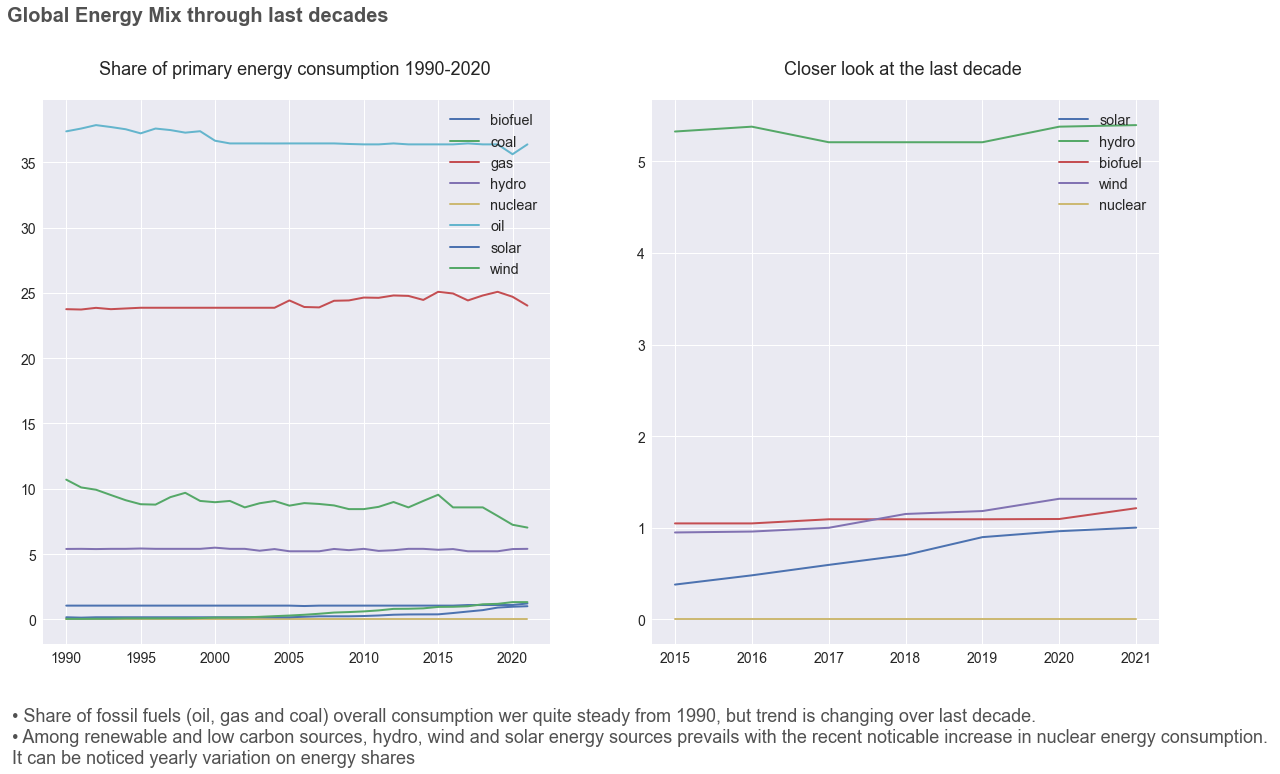

In [228]:
# Creating the first plot with 1990-2020 data
# TODO: adjust nuclear
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for i in pure_energy_src:
    axes[0].plot(wec1[wec1['Energy Sources'] == i]['year'],
                 wec1[wec1['Energy Sources'] == i]['Share of primary energy consumption'],
                 linewidth=2,
                 fillstyle='full',
                 label = i)

# Second plot with data on the last decade with the closer look at the renewable and lower carbon sources exclusively in latest 7 years
lc_srcs = ['solar',  'hydro',  'biofuel', 'wind', 'nuclear'] # Low-carbon srcs
wec2 = wec1[(wec1['year'] >= 2015)] 
wec2 = wec2[wec2['Energy Sources'].isin(lc_srcs)]

for j in lc_srcs:
    axes[1].plot(wec2[wec2['Energy Sources'] == j]['year'], 
            wec2[wec2['Energy Sources'] == j]['Share of primary energy consumption'], 
            linewidth=2,
            label=j)
#General settings

axes[0].set_title('Share of primary energy consumption 1990-2020 \n', size=18)
axes[1].set_title('Closer look at the last decade \n', size=18)

axes[0].legend(fontsize='x-large')
axes[1].legend(loc='upper right', fontsize='x-large')

axes[0].text(x=0.1, y=0.99, s="Global Energy Mix through last decades", transform=fig.transFigure, ha='left', fontsize=20, weight='bold', alpha=.8)
axes[0].text(x=0.1, y=-0.04, s=" • Share of fossil fuels (oil, gas and coal) overall consumption wer quite steady from 1990, but trend is changing over last decade.\n • Among renewable and low carbon sources, hydro, wind and solar energy sources prevails with the recent noticable increase in nuclear energy consumption. \n It can be noticed yearly variation on energy shares", 
             transform=fig.transFigure, 
             ha='left', 
             fontsize=18, alpha=.8)

axes[0].xaxis.set_tick_params(labelsize=14) 
axes[1].xaxis.set_tick_params(labelsize=14) 
axes[0].yaxis.set_tick_params(labelsize=14) 
axes[1].yaxis.set_tick_params(labelsize=14) 

plt.show()


Let's Try some animations !

In [140]:
import plotly.express as px

# Focusing on columns with data on annual percentage change in energy sources consumption starting year 1990
cons = wec.copy()
cons_features = [col for col in cons.columns if '_cons_change_pct' in col] + ['gdp', 'energy_per_gdp', 'energy_per_capita', 'year', 'country']

cons = cons[cons_features]

# Central America removed due to it is the part of 'South and Central America' value.

regions = ['World', 'Europe', 'North America', 'Central America (BP)', 'South America', 'Africa', 'South Africa', 'Eastern Africa', 'Asia', 'Middle East (EIA)', 'China', 'India', 'United States']

cons = cons[cons['country'].isin(regions)]

fig = px.bar(cons,
             x='country', y='energy_cons_change_pct',
             color='country',
             animation_frame='year',
             animation_group='country',
             range_y=[-15, 15],
             labels={'energy_cons_change_pct': 'Energy consumption change, %'}, 
             title='Regional Changes in Energy Consumption from 1990, %')

fig.add_vrect(x0=11.5, x1=10.5)
plt.tight_layout()
fig.show()

<Figure size 432x288 with 0 Axes>

Add comments ...


### Animation: Historical World Energy consumption per capita

In [141]:
pop = wec.copy()

pop = pop.groupby('country').get_group('World')

# Interestingly enough is that the renewbles/lowe carbon energy consumption is increasing throughout the last decade as 
# The lower levels of general energy consumption significantly decreased during well-known global crisises like energy crisis in 1970-80s, in 2000s and mid-2010s and during pandemic as we will see later as well.

pop.nsmallest(10, ['energy_cons_change_pct', 'fossil_cons_change_pct'])
# pop.nlargest(10, ['low-carbon_cons_per_capita','renewables_cons_per_capita'])

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_cons,biofuel_elec_per_capita,biofuel_elec,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_cons,coal_elec_per_capita,coal_elec,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_prod,coal_share_elec,coal_share_energy,elec_demand,elec_generation,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_elec,fossil_cons_per_capita,fossil_fuel_cons,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_cons,gas_elec_per_capita,gas_elec,gas_cons_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_prod,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_cons,hydro_elec_per_capita,hydro_elec,hydro_cons_per_capita,hydro_share_elec,hydro_share_energy,low-carbon_cons_change_pct,low-carbon_cons_change_twh,low-carbon_cons,low-carbon_elec_per_capita,low-carbon_elec,low-carbon_cons_per_capita,low-carbon_share_elec,low-carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_cons,nuclear_elec_per_capita,nuclear_elec,nuclear_cons_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_cons,oil_elec_per_capita,oil_elec,oil_cons_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_prod,oil_share_elec,oil_share_energy,other-renewables_cons,other-renewables_elec,other-renewables-exc-biofuel_elec,other-renewables_cons_change_pct,other-renewables_cons_change_twh,other-renewables_elec_per_capita,other-renewables-exc-biofuel_elec_per_capita,other-renewables_cons_per_capita,other-renewables_share_elec,other-renewables-exc-biofuel_share_elec,other-renewables_share_energy,per_capita_elec,primary_energy_cons,renewables_cons_change_pct,renewables_cons_change_twh,renewables_cons,renewables_elec_per_capita,renewables_elec,renewables_cons_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_cons,solar_elec_per_capita,solar_elec,solar_cons_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_cons,wind_elec_per_capita,wind_elec,wind_cons_per_capita,wind_share_elec,wind_share_energy,gdp_per_capita
21964,World,2020,ESH,7.794789e+09,1.136302e+14,-4.873,-54.584,136.702,1065.565,78.343,610.67,2.271,0.680,421.854,-3.972,-1735.926,5383.592,41963.961,1210.971,9439.266,-5.082,-2359.527,5653.582,44068.473,35.104,26.785,25998.789,26889.158,-3.986,-6504.016,20099.318,1.424,-5.385,-7331.070,2113.280,16472.574,16523.912,128800.398,61.261,82.211,-1.554,-607.219,38455.727,817.424,6371.650,4933.518,-2.677,-1062.188,4953.970,38615.152,23.696,24.546,11343.30,2.709,260.035,11413.827,557.551,4345.990,1464.289,16.163,7.285,2.786,827.049,27869.547,1306.840,10186.543,3575.407,37.883,17.789,0.0,0.0,-3.661,-283.988,6789.302,345.613,2693.979,871.005,10.019,4.334,-9.346,-4987.918,48380.707,84.885,661.659,6206.801,-6.849,-3566.559,6223.134,48508.016,2.461,30.881,2185.724,703.916,79.59,4.323,90.566,90.306,10.211,280.408,2.618,0.296,1.395,3449.633,156669.938,4.998,1111.035,21080.244,961.227,7492.564,2704.402,27.865,13.455,20.212,366.851,2222.443,108.563,846.229,285.119,3.147,1.419,12.381,448.167,4192.682,204.807,1596.428,537.883,5.937,2.676,14890.441781
21953,World,2009,ESH,6.873069e+09,5.986666e+13,13.830,72.940,87.347,600.339,41.666,286.37,1.412,0.446,460.781,-1.467,-598.227,5845.330,40175.355,1180.727,8115.217,-0.065,-25.957,5774.237,39686.727,40.018,29.820,19521.891,20278.684,-1.525,-2085.750,19602.229,1.842,-1.850,-2185.469,1975.564,13578.186,16869.918,115948.109,66.958,86.061,-2.066,-620.125,29401.191,650.139,4468.451,4277.739,-3.101,-941.311,4278.891,2940

In [142]:
# Now, focusing on per capita energy consumption patterns to visualize patterns related to the changes in GDP and energy mix consumption 

wemc=wec.copy()
wemc=wemc[(wemc['year']>=1990)]
wemc=wemc.loc[wemc['country'].isin(regions)]
wemc_features = ['year', 'country', 'energy_per_capita', 'fossil_cons_per_capita', 'population', 'primary_energy_cons', 'gdp_per_capita']
wemc=wemc[wemc_features]

px.scatter(wemc, x='population', y='primary_energy_cons', 
           animation_frame="year", 
           animation_group="country",
           size='gdp_per_capita', 
           color="country", 
           hover_name="country",      
           size_max=55, 
           log_x=True,
           range_y=[-100, 100000],
           title='Primary energy consumption vs growing population <br><sup>Asia-Pacific with the largest GDP per capita is significantly increasing its primary energy consumption</sup>', 
           labels={'primary_energy_consumption': 'Energy consumption, kw/hrs', 'population': 'Population'})

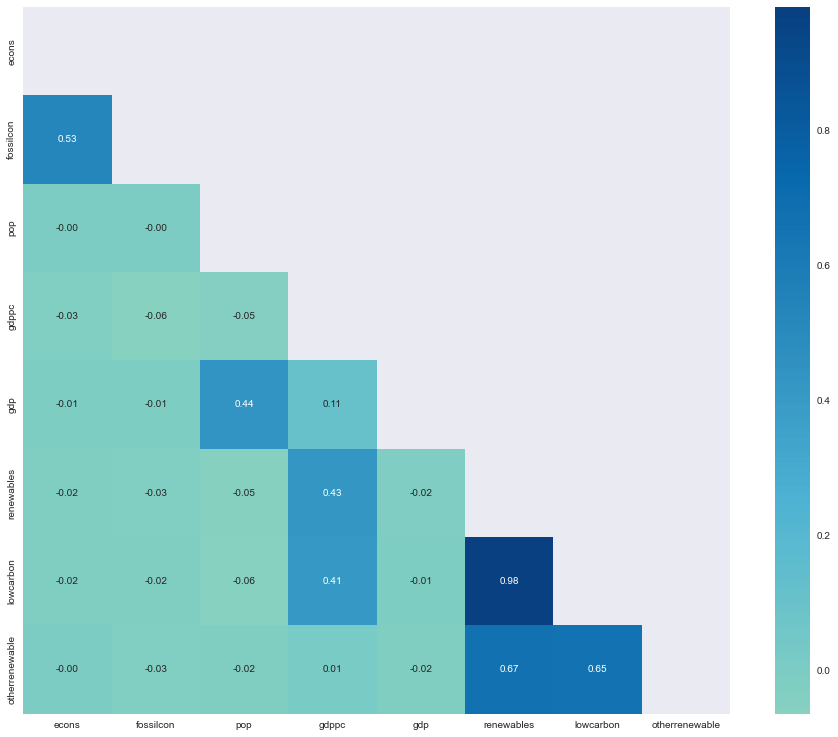

In [143]:
# Looking at the correlation between main data like gdp per capita/population size/energy consumption etc.
wo = wec.copy()
wo.drop_duplicates()

wo=wo[wo['country'].isin(regions)]

wo=pd.DataFrame().assign(
    country=wec['country'], 
    econs=wec['energy_cons_change_pct'], 
    fossilcon=wec['fossil_cons_change_pct'], 
    pop=wec['population'], 
    gdppc=wec['gdp_per_capita'],
    gdp=wec['gdp'],
    renewables=wec['renewables_cons_per_capita'],
    lowcarbon=wec['low-carbon_cons_per_capita'],
    otherrenewable=wec['other-renewables_cons_per_capita'])

c=wo.corr()

# creating a mask
mask=np.triu(np.ones_like(c, dtype=bool))
plt.figure(figsize=(16, 13))
sns.heatmap(c, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap="GnBu")

# c.style.background_gradient(cmap="GnBu")

plt.show()

# From the table and plots below we can see that there is: 

## consumption of renewables and low carbon energy sources are highly interrelated
## there is a little positive correlation (0.26) between the energy consumption and fossil fuels consumption meaning the rise of consumption specifically of fossil fuels 
## surprisingly, no correlation found between the gdp per capita and consumption of energy from rewewable sources.

## 2.2 Energy Consumption profile of countries with the highest GHG emissions

In [144]:
# Load the data
ghg_raw = cleaning.load_data('datasets/ghg/ghg-emissions.csv')
ghg_raw.head()

,Country/Region,unit,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,China,MtCO2e,2891.73,3039.14,3168.05,3397.80,3557.37,3960.70,3982.11,3977.65,4095.97,4028.58,4221.08,4430.04,4736.95,5387.28,6172.83,6934.85,7614.35,8224.19,8480.50,9055.11,9887.06,10388.48,10675.66,11168.26,11228.48,11108.86,11151.31,11385.48,11821.66,12055.41
1,United States,MtCO2e,5417.32,5372.07,5456.12,5567.55,5661.57,5729.69,5901.00,6160.86,6208.83,6210.12,6372.54,6335.10,6182.64,6245.34,6331.91,6352.14,6260.20,6367.28,6184.08,5757.60,6026.14,5811.96,5593.24,5734.28,5779.53,5665.20,5743.85,5689.61,5892.37,5771.00
2,India,MtCO2e,1002.56,1056.25,1081.28,1114.22,1158.48,1223.65,1272.74,1331.88,1362.33,1440.38,1477.87,1725.86,1744.38,1787.88,1876.85,1948.11,2045.40,2191.17,2289.14,2438.92,2546.79,2584.75,2740.40,2804.34,2984.52,3003.07,3076.48,3215.07,3360.56,3363.59
3,Indonesia,MtCO2e,1226.82,1246.27,1266.98,1282.35,1302.70,1339.10,1164.23,2134.80,1366.90,1258.63,1190.41,1018.47,1500.73,1168.00,1517.63,1245.04,1664.11,1107.10,1093.88,1487.25,1131.73,1683.13,1702.30,1638.39,2015.50,2067.75,1434.45,1447.22,1692.36,1959.71
4,Russia,MtCO2e,2648.36,2585.28,2428.18,2233.86,1995.87,1918.33,1874.95,1723.24,1725.07,1759.66,1812.87,1423.46,1422.39,1498.74,1491.42,1513.85,1553.64,1559.85,1570.09,1427.44,1521.96,1693.95,1674.58,1633.10,1621.85,1602.81,1733.91,1769.68,1868.15,1924.82


In [145]:
# Clean the data
ghg = ghg_raw.copy()
ghg = ghg.dropna()

In [146]:
# Format

ghg['1990'] = ghg['1990'].replace('false', 0.0)
ghg['1990'] = ghg['1990'].astype('float64')

ghg.columns = ghg.columns.str.replace('/', '_').str.lower()

In [147]:
# We will need to find the top ten countries based on their GHG emissions level

ghg=pd.melt(ghg, id_vars='country_region', 
            value_vars=['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'], 
            value_name='ghg', 
            var_name='year', 
            ignore_index=False)

In [148]:
# filter for last years
ghg=ghg[ghg['year']>='2010']

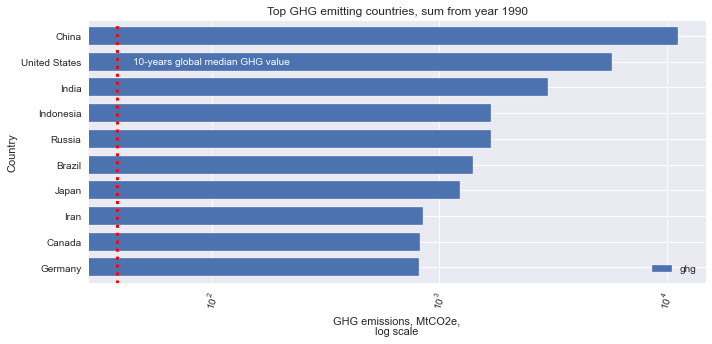

In [149]:
# Choosing the top 10 countries with the largest amount of GHG emissions:

topghg=ghg.groupby('country_region', as_index=False).agg({'ghg': 'median'}).sort_values('ghg', ascending=False).head(10)
topghg.sort_values('ghg', ascending=False)

# Let's calculate the median value of GHG emission for the last 10 year for all countries for comparison

ghg=ghg[ghg['year']>='2010']
medianghg=ghg.ghg.median()

# Selecting top countries with the highest GHG emissions from the list of World Energy Consumption

t=[]
for c in topghg['country_region']:
    if c not in t:
        t.append(c)
        
ctbarh=topghg[topghg['country_region'].isin(t)].sort_values(by='ghg')

plt.style.use('seaborn')
ctbarh.plot.barh(x='country_region', y='ghg', width=0.7, figsize=(10,5))

plt.title('Top GHG emitting countries, sum from year 1990')
plt.ylabel('Country')
plt.xlabel('GHG emissions, MtCO2e,\nlog scale')
plt.xticks(rotation=70)
plt.axvline(x=38, linestyle='dotted',color='red', linewidth=3)
plt.text(x=45, y=7.9, s='10-years global median GHG value', color='white')
plt.tight_layout()
plt.xscale('log')
plt.show()

In [150]:
import plotly.express as px

ct=ghg[ghg['country_region'].isin(t)]

fig = px.bar(ct, x='country_region', y='ghg', color='country_region',
             animation_frame="year", 
             animation_group="country_region", 
             range_y=[0, 13000], 
             title=('Total GHG emissions, CO2e: top 10 emitters<br><sup>China and the USA are leading the list with the highest GHG emissions levels</sup>'),
             labels={'ghg': 'Greenhouse gases emissions, ', 'gdp_per_capita': 'GDP per capita', 'country_region': 'Region'})
plt.tight_layout()                
fig.show()

<Figure size 576x396 with 0 Axes>

In [151]:
cons_per_src_features = ['year', 'country'] + [col for col in wec.columns if '_cons_per_capita' in col]

cons_per_src=wec.copy()
cons_per_src=cons_per_src[cons_per_src_features]
cons_per_src=cons_per_src.fillna(method='ffill').fillna(method='bfill')
cons_per_src=cons_per_src[cons_per_src['year']>=2000]
cons_per_src['year']=pd.to_datetime(cons_per_src['year'], format='%Y')
cons_per_src['year']=cons_per_src['year'].dt.year
cons_per_src=cons_per_src[cons_per_src['country'].isin(t)]

fig = px.bar(cons_per_src, 
             x="country", y=['other-renewables_cons_per_capita', 'oil_cons_per_capita', 'nuclear_cons_per_capita', 'hydro_cons_per_capita',
                             'gas_cons_per_capita','coal_cons_per_capita', 'biofuel_cons_per_capita','solar_cons_per_capita', 'wind_cons_per_capita'], 
             title="Consumption Profiles per capita, top emitters",
             color_discrete_map={
                'coal_cons_per_capita':'black',
                'gas_cons_per_capita': '#F0F8FF',
                'oil_cons_per_capita': "#B8860B",
                'nuclear_cons_per_capita': "#E0EEEE",
                'hydro_cons_per_capita': "#00FFFF",
                'biofuel_cons_per_capita': '#228B22',
                'solar_cons_per_capita': '#FFFF00', 
                'wind_cons_per_capita':'#F8F8FF',
                'other-renewables_energy_per_capita': "magenta"}, 
             animation_frame="year", 
             animation_group="country",                         
             range_y=[0, 200000])
plt.tight_layout()
fig.show()

<Figure size 576x396 with 0 Axes>

### 2.3 Energy Consumption profiles for countries with top Smart Cities: focus on Renewables and Low Carbon sources

In [152]:
sci.columns

Index(['city', 'country', 'smart_mobility', 'smart_environment',
       'smart_government', 'smart_economy', 'smart_people', 'smart_living',
       'smartcity_index'],
      dtype='object')

In [153]:
# Now replacing the names in the Smart Cities dataset to those in the World Energy one so that we could now select countries from both datasets :

sci['country'].replace('UAE', 'United Arab Emirates', inplace=True)
sci['country'].replace('The Netherlands', 'Netherlands', inplace=True)
sci['country'].replace('UK', 'United Kingdom', inplace=True)
sci['country'].replace('US', 'United States', inplace=True)
sci['country'].replace('Singapore ', 'Singapore', inplace=True)
sci['country'].replace('Isreal', 'Israel', inplace=True)   
temp = sci.sort_values('smartcity_index', ascending=False)


In [154]:
# Let's add the first 15 countries iterating through the list of Rankings for Smart Cities and add to the final list of countries with the best performing cities only those that are not in the list.

topsmartcountries=[]
x=0
for country in temp.country:
    if country not in topsmartcountries and x<11:
        x+=1
        topsmartcountries.append(country)
topsmartcountries

['Canada',
 'Netherlands',
 'Norway',
 'Denmark',
 'France',
 'Switzerland',
 'Finland',
 'United States',
 'Singapore',
 'Sweden',
 'Austria']

In [155]:
sc=wec.copy()
sc=sc.loc[sc['country'].isin(topsmartcountries)]
sc_features = ['year', 'country', 'low-carbon_cons_per_capita', 'other-renewables_cons_per_capita', 'population', 'gdp', 'renewables_cons_per_capita', 'wind_cons_per_capita']
sc=sc[sc_features]
sc=sc[sc['year']>=2000]

#Calculation of total renewable and low carbon energy consumption per capita

sc['renewlowcarbon']=sc['low-carbon_cons_per_capita']+sc['other-renewables_cons_per_capita']+sc['renewables_cons_per_capita']
sc['gdp_per_capita'] = sc['gdp'] / sc['population']

px.scatter(sc, x='renewlowcarbon', y='gdp_per_capita', 
           animation_frame="year", animation_group="country",
           size='population', 
           color="country", 
           hover_name="country",
           log_x=True, 
           size_max=55, 
           title='Growth of renewables consumption in countries with Smart Cities<br><sup>Noticable growth in renewables and low carbon energy consumption throughout the last decade in countries with the best performing Smart Cities</sup>',
           labels={'renewlowcarbon': 'Consumption of renewable and low carbon energy, per capita', 'gdp_per_capita': 'GDP per capita'})

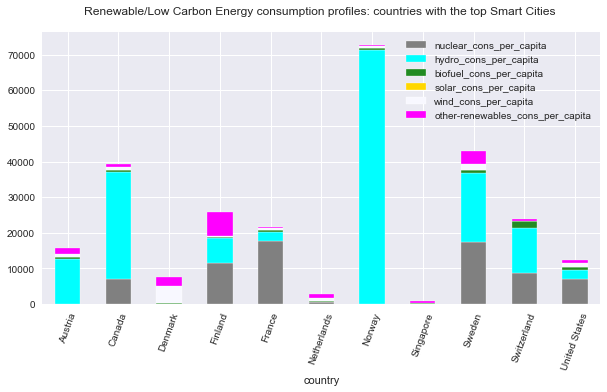

In [156]:
# Let's look closer at the Renewable/ow Carbon Energy mix profile for those countries all together starting from 2015 again

scr=wec.copy()
scr_features = ['year', 'country'] + [col for col in wec.columns if '_cons_per_capita' in col]
scr=scr[scr_features]
scr=scr[scr['year']>2000]
scr=scr[scr['country'].isin(topsmartcountries)]

sns.set_style(style='darkgrid')

scr=scr.groupby('country', as_index=False).median().groupby('country', as_index=False).mean()
scr.plot(x='country', 
          y=['nuclear_cons_per_capita', 'hydro_cons_per_capita', 'biofuel_cons_per_capita', 'solar_cons_per_capita', 'wind_cons_per_capita', 'other-renewables_cons_per_capita'], 
          kind='bar', 
         stacked=True,
          figsize=(10, 5), 
          title='Renewable/Low Carbon Energy consumption profiles: countries with the top Smart Cities \n', 
          color={'coal_cons_per_capita':'black',
                'gas_cons_per_capita': '#F0F8FF',
                'oil_cons_per_capita': "#FFB90F",
                'nuclear_cons_per_capita': "grey",
                'hydro_cons_per_capita': "#00FFFF",
                'biofuel_cons_per_capita': '#228B22',
                'solar_cons_per_capita': '#FFD700', 
                'wind_cons_per_capita':'#F8F8FF',
                'other-renewables_cons_per_capita': "magenta"})
plt.xticks(rotation=70)
plt.show()

In [157]:
fig = px.bar(scr, x="country",
             y=['other-renewables_cons_per_capita', 'oil_cons_per_capita', 'nuclear_cons_per_capita', 'hydro_cons_per_capita','gas_cons_per_capita','coal_cons_per_capita', 'biofuel_cons_per_capita','renewables_cons_per_capita', 'solar_cons_per_capita', 'wind_cons_per_capita'], 
             title="Historical perspective on Renewables and Low Carbon Consumption Profiles <br><sup>Countries with top Smart Cities performers, per capita</sup>",
            color_discrete_map={
                'coal_cons_per_capita':'black',
                'gas_cons_per_capita': '#F0F8FF',
                'oil_cons_per_capita': "#FFB90F",
                'nuclear_cons_per_capita': "#E0EEEE",
                'hydro_cons_per_capita': "#00FFFF",
                'biofuel_cons_per_capita': '#228B22',
                'solar_cons_per_capita': '#FFD700', 
                'wind_cons_per_capita':'#F8F8FF',
                'renewables_cons_per_capita':'#CAFF70',
                'other-renewables_cons_per_capita': "magenta"}, 
             animation_frame="year", 
             animation_group="country",
            range_y=[0, 200000])
plt.tight_layout()
fig.show()

<Figure size 576x396 with 0 Axes>

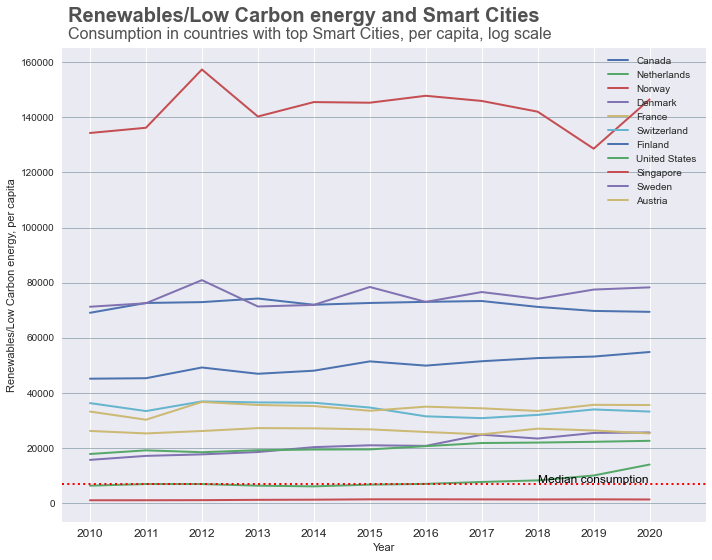

In [158]:
wec1 = wec.copy()
wec1 = wec1[wec1['year'].between(2010, 2020)]
# Now calculating the columns with all renewables/low carbon sources consumption numbers:
wec1['renlowcarbon'] = wec1['other-renewables_cons_per_capita'] + wec1['renewables_cons_per_capita'] + wec1['low-carbon_cons_per_capita']


# Calculation of the median renewables/low carbon consumption for the last decade for all countries in the list
medianrenew = wec1.groupby('country').agg('median').mean()
medianrenew = wec1.renlowcarbon.median()

# Chosing countries that are in the list of those with Smart Cities

wec1= wec1[wec1["country"].isin(topsmartcountries)]

# Plotting countries with top Smart Cities

column='renlowcarbon'

fig, ax = plt.subplots(figsize=(10,8))

sns.set_style(style='darkgrid')

ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

for region in topsmartcountries:
    ax.plot(wec1[wec1['country'] == region]['year'], 
            wec1[wec1['country'] == region]['renlowcarbon'], 
            alpha=1, 
            linewidth=2)
       
ax.plot(wec1[wec1['country'] == 'World']['year'], 
        wec1[wec1['country'] == 'World']['renlowcarbon'], 
        color='grey',
        linewidth=3)

year_start, year_end = 2010, 2020

labels = wec1[['country', column]][wec1['year'] == year_end-1]

# add=0
# for region, value in labels.itertuples(index=False):
   # ax.text(x=year_start, y=value +add, s=region, va="center")
   # add=-1

ax.spines[['top','right','left', 'bottom']].set_visible(False)

ax.set_xticks(np.arange(year_start, year_end +.1, 1))
ax.set_xlim([None, year_end + 1])

# Add in title and subtitle
ax.text(x=0.1, y=0.94, s="Renewables/Low Carbon energy and Smart Cities", transform=fig.transFigure, ha='left', fontsize=20, weight='bold', alpha=.8)
ax.text(x=0.1, y=0.91, s="Consumption in countries with top Smart Cities, per capita, log scale", transform=fig.transFigure, ha='left', fontsize=16, alpha=.8)
ax.legend(topsmartcountries, loc='upper right')
plt.xlabel('Year') 
ax.xaxis.set_tick_params(labelsize=12) 
plt.ylabel('Renewables/Low Carbon energy, per capita')
plt.axhline(y=medianrenew, linestyle='dotted', color='red', linewidth=2)
ax.annotate('Median consumption',xy=(2015,1000), xycoords='data', xytext=(2018, 7510), color='black', size=12)  
plt.tight_layout()
plt.show()

# Insights:

* Throughout the last decade there is a noticable shift to Renewables/Low Carbon energy sources' consumption worldwide and specifically in coutries with top performing Smart Cities.
* Asia-Pacific is the region with the largest gdp per capita and GHG emissions numbers, as well as huge Renewables/Low Carbon energy consumption potential.
* Asia-Pacific and the North America are the largest energy consumers. Among consumers of Renewable/Low carbon energy sources Norway, Canada and Sweden are leading the list.
* Fossil fuels (oil, gas and coal) are stil the primary energy sources however hydro energy and nuclear are the most popular among renewables/low carbon sources.
